# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

> This is prepared for Udacity Machine Learning Engineer Nanodegree online class 
 
>Author: jtmoogle @github.com All Rights Reserved  

>Date: Dec 3, 2017

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
#0-------- 
# global logger to console and file
import logging
import os.path
import time
import sys 
from platform import python_version
import gc

def now(): return (time.time())
def info_timetaken(title, starttime): return (log_timetaken(logging.INFO, title, starttime))
def info(msg): return (logger.info(msg))
def debug(msg): return (logger.debug(msg))
def log_timetaken(level, title, starttime ):
    '''
    inputs: logging level, starttime
    output: elapsed time 
    '''  
    elapsed_time = now() - starttime
    msg = "{0} -> Time taken at {1:.2f} seconds".format(title, elapsed_time)
    if (level == logging.INFO): 
        logger.info(msg)
    else: 
        logger.debug( msg )
    #return elapsed_time

def clean_mem():
    '''
    release unreferenced memory with gc.collect()
    '''
    gc.collect()

logger = logging.getLogger('jtMoogle')
logger.setLevel(logging.DEBUG)
console = logging.StreamHandler()
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s', datefmt="%H:%M:%S")
console.setFormatter(formatter)
console.setLevel(logging.INFO)
logger.addHandler(console)
# file handler
ldir=os.path.realpath(".")
fname = 'exec_log.' + time.strftime('%Y-%m-%d-%H') + ".txt"
filename = os.path.join(ldir, 'log', fname)
notnew = os.path.exists(filename)
fhandler = logging.FileHandler(filename=filename, mode='a')

if (notnew): debug("\n\n===> Appending new logging to existing stream ")
else: debug("===> New logging stream")

info(" Logging to "+filename)
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.DEBUG)
logger.addHandler(fhandler)
info( '--> sys version= {} '.format(sys.version ))
info( '--> python version= {}'.format(python_version()))


22:37:10 INFO  Logging to I:\_githup\joyce.wrk\dog-project\log\exec_log.2017-12-03-22.txt
22:37:10 INFO --> sys version= 3.6.3 |Anaconda, Inc.| (default, Nov  8 2017, 15:10:56) [MSC v.1900 64 bit (AMD64)] 
22:37:10 INFO --> python version= 3.6.3


In [2]:
#1----- 
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

focTopic = "1 Import Data "
g_start_time = now()  # global: start time
info( "{0} >>> starting ".format(focTopic))

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    debug('{} path={}\nfilename={}'.format(focTopic, path, dog_files))
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('data_dogImages/train')
valid_files, valid_targets = load_dataset('data_dogImages/valid')
test_files, test_targets = load_dataset('data_dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("data_dogImages/train/*/"))]
info('Sample dog_names={}'.format(dog_names[1:3]))

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

debug('train_targets={0} test_targets={1}  valid_targets={2}'.format( train_targets, test_targets, valid_targets))

Using TensorFlow backend.
22:37:15 INFO 1 Import Data  >>> starting 
22:38:25 INFO Sample dog_names=['\\002.Afghan_hound', '\\003.Airedale_terrier']


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


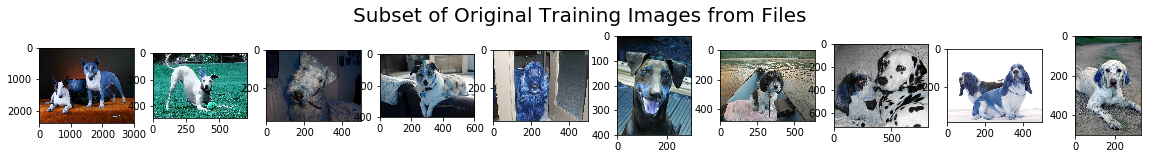

In [3]:
# jtmoogle_helper visualize the first 20 training images
import numpy as np
import matplotlib.pyplot as plt
import cv2    

batch_size=20
x_train_subset = train_files[30:40]
# visualize subset of training data
fig = plt.figure(figsize=(20, 4))
for i in range(len(x_train_subset)):
    ax = fig.add_subplot(2, 10, i+1)
    img = cv2.imread(x_train_subset[i])
    ax.imshow(np.squeeze(img))
fig.suptitle('Subset of Original Training Images from Files', fontsize=20)
plt.show()

# release unused references
plt.close(fig);
x_train_subset=None; 
clean_mem()

### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [4]:
#2-------
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("data_lfw/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

22:38:38 INFO human file=data_lfw/lfw\Lauren_Hutton\Lauren_Hutton_0001.jpg


Number of faces detected: 1


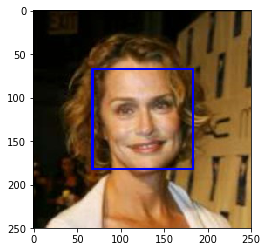

In [5]:
#3-------
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
info( 'human file={}'.format(human_files[3]))

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
#4-------
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    """     Detect a human face in an image
    input: img_path (string): file path to an image 
    return: (boolen) True if face is detected in image stored at img_path, False otherwise
    """
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.



> __Answer:__ 

> | Human Face Detector Assessment | Total Image File Count | Detected Human Face<br>Count | Detected Human Face<br>Percentage | 
| :--- | :---: | :---: | :---: |
| Human Image files | 100 | 98 | 98% |
| Dog Image files |  100 |  11 |  11.00% |

See execution output for details below.    

In [7]:
#5-------
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

start_time = now() 
focTopic="5 HumanFaceDetector"
cntMatrix = {
    'human' : [0, (len(human_files_short))],
    'dog' : [0,len(dog_files_short)]
}

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
item = [cntMatrix['human']]
for imgfile in human_files_short: 
    if face_detector(imgfile): item[0][0] += 1

print( "Human_file: total cnt= {0}  has detected human face cnt= {1} pct={2:.2f}% ".format(
 item[0][1], item[0][0], 100*(item[0][0]/item[0][1]) ))
info_timetaken( focTopic, start_time )

start_time = time.time()
item = [cntMatrix['dog']]
for imgfile in dog_files_short:
    if face_detector(imgfile): item[0][0] += 1
    
print( "Dog_file: total cnt= {0}  has detected human face cnt= {1} pct= {2:.2f}% ".format(
 item[0][1], item[0][0], 100*(item[0][0]/item[0][1]) ))
info_timetaken( focTopic, start_time )

22:38:41 INFO 5 HumanFaceDetector -> Time taken at 2.16 seconds


Human_file: total cnt= 100  has detected human face cnt= 98 pct=98.00% 


22:38:50 INFO 5 HumanFaceDetector -> Time taken at 9.42 seconds


Dog_file: total cnt= 100  has detected human face cnt= 11 pct= 11.00% 


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

> __Answer:__

>Yes, I would use OpenCV Haar to detect Human Face for my Dog Application.  Derived test outcome from above exercise using OpenCV Haar Cascades , I obtained the following applied to 100 images to look for human face

>| Actual True Condition (>) <br> OpenCV prediction outcome (v)   | Actual: Positive<br>Human files | Actual: Negative<br>Dog files |  |
| :--: | :--: | :--: | :--: | 
| Predict Human Face: True |  <b>True Positive<br>TP = 98</b> | False Positive<br>FP = 11<br>Type I error | Positive Predictive Value<br> TP/(TP+FP)<br>98/109=89.91% |
| Predict Human Face: False | False Negative<br>FN = 2<br>Type II error | <b>True Negative<br> TN = 89</b> | Negative Predictive Value<br> TN/(FN+TN)<br>89/91= 97.8% |
|-------|-------|-------|-------|-------
|  | Sensitivity<br>TP/(TP+FN)<br>98% | Specificity<br>TN/(FP+TN)<br>89% | |

>Hence, PPV/Positive Predictive Value 89.91% was in itself Good at confirming the detecting human face.  
- NPV/Negative Predictive Value 97.8% - as negative result was very good at reassuring that detecting non-human face

> However, Sensitivity 98% - correctly detected human face of all cases
- Few false negative 
- Type II error/False Negative, 1 - sensitivity = 2%

> Specificity 89% - correctly detected non-human face of all cases
- Small number of false positive
- Type I error/False Positive, 1 - specificity = 11%

> Likelihood ratio/Assessing the value of performing detecting human face
- Likelihood ratio Positive - Sensitivity/(1−specificity) = 98%/11% = 8.9 
- Likelihood ratio Negative - (1−sensitivity)/specificity = 2%/89% = 0.02

>Also, I did agree to pose on the user to provide a clear view of a face in the image, so it would increase chance having better accuracy to detect and classify parts of human face (i.e. eyes, nose, and mouth)
If there is no clear view of a face image, we could detect if skin color present, or shape of face, eyes, nose, ears, and mouth present in the images


In [8]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [9]:
#6-------
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [10]:
#7-------
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    """ convert image file 3D tensor with shape to 4D tensor with shape 
    3D array/tensor= (number of rows, number of columns,number of channels)
    4D array/tensor= (total number of image, number of rows, number of columns, number of channels)
        (1) resize to a square image 
        (2) convert to a 3D array/tensor
        (3) resize to a 4D array/tensor
    
    input: img_path (string): file path to an image 
    return: a 4D tensor with shape (nb_samples,rows,columns,channels) 
    """    
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [11]:
#8-------
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    """ Use keras preprocess_input function to format the image for 
    supplying to ResNet-50 (i.e. convert the RGB image to BGR,
    normalization the mean pixels, etc).  And extract predictions 
    
    input: img_path (string): file path to an image 
    return: prediction vector for image located at img_path
    """     
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    # origin: return np.argmax(ResNet50_model.predict(img))
    ilocFound = np.argmax(ResNet50_model.predict(img))
    debug( '8 ResNet50_predict_labels np.argmax={}'.format(ilocFound))
    return (ilocFound)

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
#9-------
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    """ check if an image could include all categories from 'Chihuahua' 
    to 'Mexican hairless' dogs in the pre-trained ResNet-50 mode 
    input: img_path (string): file path to an image 
    return: (boolean) True if a dog is detected in the image stored at img_path; False otherwise
    """   
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?


> __Answer:__ 

> | Dog Detector Assessment | Total Image File Count | Detected Dog Count | Detected Dog Percentage | 
| :--- | :---: | :---: | :---: |
| Human Image files | 100 | 1 | 1% |
| Dog Image files |  100 |  100 |  100% |

See execution output for detail below.

In [13]:
#10-------
### Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
start_time = time.time()
focTopic="10 Assess dog detector"
cntMatrix = {
    'human' : [0, (len(human_files_short))],
    'dog' : [0,len(dog_files_short)]
}

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

item = [cntMatrix['human']]
for imgfile in human_files_short: 
    if dog_detector(imgfile): item[0][0] += 1

print("Human_file: total cnt= {0}  has detected dog cnt= {1} pct={2:.2f}% ".format(
 item[0][1], item[0][0], 100*(item[0][0]/item[0][1]) ))
info_timetaken( focTopic, start_time )

start_time = time.time()
item = [cntMatrix['dog']]
for imgfile in dog_files_short:
    if dog_detector(imgfile): item[0][0] += 1
print( "Dog_file: total cnt= {0}  has detected dog cnt= {1} pct= {2:.2f}% ".format(
 item[0][1], item[0][0], 100*(item[0][0]/item[0][1]) ))
info_timetaken( focTopic, start_time )


Human_file: total cnt= 100  has detected dog cnt= 1 pct=1.00% 


22:39:07 INFO 10 Assess dog detector -> Time taken at 5.45 seconds


Dog_file: total cnt= 100  has detected dog cnt= 100 pct= 100.00% 


22:39:11 INFO 10 Assess dog detector -> Time taken at 4.06 seconds


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [14]:
#11-------
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

focTopic = '11 Preprocess Data'

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

debug( '{0} train_tensors {1}'.format(focTopic, train_tensors.shape))
debug( 'test_tensors {}'.format(test_tensors.shape))
debug( 'valid_tensors {}'.format(valid_tensors.shape))

100%|█████████████████████████████████████████████████████████████████████████| 836/836 [00:06<00:00, 130.20it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.



> __Answer:__ 

> Using CNN to discover pattern in our data allowed to transform from the raw image pixels, to convolve the image with a set of independent filters to layers, at end to output the final class score as classifier.
    1. Input multi-channeled images 
    2. Convolved the image with a set of independent filters to layers.  
       Iterate steps
        2.1 Each filtered the chunk of input image with primitive shapes and patterns, and output to a feature map.  
        2.2 Forward feed: the feature map would be used as input parameters for consequent/next filter layer
    3. Output the final class score for classifier.  
I did hand on and experiment many model architecture patterns, and realized the size, memory and performance in computation should be part for my architectural decisions.  Here was my model architecture pattern:  (See Ref 1, Layer Patterns notation) 

>     INPUT ->[[CONV ->RELU]* 2 ->POOL?] * 2 ->[FC ->RELU] * 1 -> FC 

> Legend: 
- CONV: convolution layer
- POOL: pooling layer
- RELU: non-linearity applied to neural networks
- FC: Fully connected layer of neurons at the end of CNN
- [ ]*N: repeat and iterate N times
- POOL?: optional pooling layer
- INPUT [224 x 224 x 3] tensors, array of pixel values, 224x224 images with 3 channels


In [15]:
#12a -------- 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

focTopic = '12 Define Model Arch'
inptShape = train_tensors.shape[1:]

info('{0} train_tensors input sshape={1}'.format(focTopic, inptShape))

# Define your architecture.
model = Sequential()
# input: 224x224 images with 3 channels: Red, Green, Blue -> (224, 224, 3) tensors.
# 1: CONV 1: 32 filters, each 3x3x3, 'same' padding, relu activation
model.add(Conv2D(32, (3,3), input_shape=inptShape, padding='same', activation = 'relu'))
# 2: POOL 1: max pooling layer 2x2
model.add(MaxPooling2D(pool_size=(2,2)))
# 3: CONV 2: 32 filters, each 3x3x3
model.add(Conv2D(32, (3,3), activation = 'relu'))
# 4: POOL 2: max pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
# 5: Dropout: to minimize overfitting
model.add(Dropout(0.2))
# 6: CONV 3: 64 filters, each 3x3x3
model.add(Conv2D(64, (3,3), padding='same', activation= 'relu'))
# 7: POOL 3: max pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
# 8 CONV 4: 64 filters, each 3x3x3
model.add(Conv2D(64, (3,3), activation= 'relu'))
# 9: POOL 4: max pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
# 10: Dropout: to minimize overfitting
model.add(Dropout(0.2))

# FC 1
model.add(Flatten())  # convert 3D features maps to 1D feature vector
# RELU
model.add(Dense(512, activation='relu'))
# Dropout: to minimize overfitting
model.add(Dropout(0.4))
# FC 2
model.add(Dense(units=133, activation='softmax')) 

model.summary()

22:40:30 INFO 12 Define Model Arch train_tensors input sshape=(224, 224, 3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 64)        0         
__________

### Compile the Model

In [16]:
#13 -------
# Compile model using rmsprop optimizer and categorical crossentropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# using gpu
#from keras.utils import multi_gpu_model
#parallel_model = multi_gpu_model(model, gpus=3)
#parallel_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [17]:
#14-------
from keras.callbacks import ModelCheckpoint  

focTopic="14 Train model"

### specify the number of epochs that you would like to use to train the model.
epochs = 15
batch_size = 20
start_time=now()
savefname='saved_models/weights.best.from_scratch.hdf5'
redofit=False

if (not redofit) and (os.path.exists(savefname)):
    info( '{} exist.  Skip fitting'.format(savefname))
else: 
    ### Do NOT modify the code below this line.
    checkpointer = ModelCheckpoint(filepath=savefname,verbose=1, save_best_only=True)
    info( '{}  Save best fitting filename={}'.format(focTopic, savefname))
    model.fit(train_tensors, train_targets, 
              validation_data=(valid_tensors, valid_targets),
              epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)
    ### Do NOT modify the code above this line.
    
    info_timetaken('{} fit'.format(focTopic), start_time )

22:40:30 INFO 14 Train model  Save best fitting filename=saved_models/weights.best.from_scratch.hdf5


Epoch 00000: val_loss improved from inf to 4.86870, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00001: val_loss improved from 4.86870 to 4.59620, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00002: val_loss improved from 4.59620 to 4.44058, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00003: val_loss improved from 4.44058 to 4.18710, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00004: val_loss improved from 4.18710 to 4.02538, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00005: val_loss improved from 4.02538 to 4.01865, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00006: val_loss improved from 4.01865 to 3.96020, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Ep

22:45:53 INFO 14 Train model fit -> Time taken at 323.61 seconds


### Load the Model with the Best Validation Loss

In [18]:
#15-------
info('{} filename={}'.format('15 Load best fitting', savefname))
model.load_weights(savefname)

22:45:54 INFO 15 Load best fitting filename=saved_models/weights.best.from_scratch.hdf5


### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [19]:
#16-------
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(
    model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(
    dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)

print('Test accuracy: %.4f%%' % test_accuracy)

model=None
clean_mem()

Test accuracy: 11.6029%


### (Optional) Augmented Training Imagines
The following would involve
- Create and Configure Augmented Image Generator
- Define the Model Architecture
- Compile the Model
- Train the Model
- Locate the Model with Best Validation Accuracy
- Calculate Classification Accuracy on Test Set


In [25]:
#12b ------- Augment Training Data ---------
# Create and Configure Augmented Image Generator
from keras.callbacks import ModelCheckpoint  
from keras.preprocessing.image import ImageDataGenerator

## specify the number of epochs that you would like to use to train the model.
# See reference: Data Augmentation example  Classifier from little data
bypass=False

focus_subject = "12b Augmented Image Generator"
epochs = 15
img_width, img_height = 224, 224
train_data_dir = 'data_dogImages/train'
valid_data_dir = 'data_dogImages/valid'
batch_size = 20
class_mode='categorical'

def myGenerator():
    datagen = ImageDataGenerator( rescale=1. / 255, 
        shear_range=0.2, zoom_range=0.2,
        width_shift_range = 0.2,  # randomly shift images horizontally (20% of total width)
        height_shift_range = 0.2, # randomly shift images vertically (20% of total height)
        horizontal_flip=True)     # randomly flip images horizontally
    return datagen

start_time = now()
if not bypass:
    # augmentation configuration prepared for training, test, validation
    data_generator = myGenerator()
    
    train_generator = data_generator.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=class_mode)

    valid_generator = data_generator.flow_from_directory(
        valid_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=class_mode)
    
    info_timetaken( focus_subject, start_time )


Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


23:22:50 INFO 12b Augmented Image Generator -> Time taken at 0.80 seconds


100%|████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 80.16it/s]


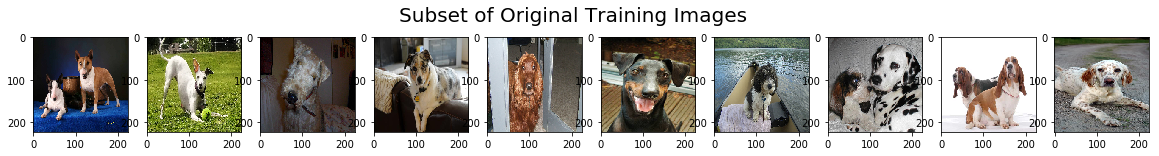

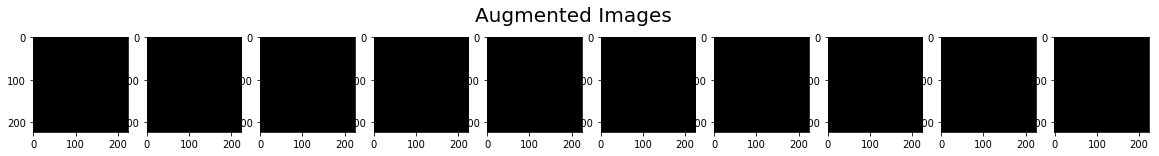

In [26]:
# visualize the first 24 training images
import numpy as np
import matplotlib.pyplot as plt
import cv2    

batch_size=20
x_train_subset = paths_to_tensor(train_files[30:40]).astype('float32')/255  #x_train_subset = train_tensors[30:40] 

# visualize subset of training data
fig = plt.figure(figsize=(20, 4))
for i in range(len(x_train_subset)):
    ax = fig.add_subplot(2, 10, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20, 4))
for x_batch in data_generator.flow(x_train_subset, batch_size=batch_size):
    for i in range(len(x_batch)):
        ax = fig.add_subplot(2, 10, i+1)
        ax.imshow(x_batch[i]) 
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

x_train_subset=None

In [27]:
  
#13b ---------
# Define the Model Architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

focus_subject = '13b Augmented Model Architecture'
inptShape = train_tensors.shape[1:]
info( '{0} train_tensors inptShape={1}'.format(focus_subject, inptShape))

# Model architecture
aug_model = Sequential()
# input: 224x224 images with 3 channels: Red, Green, Blue -> (224, 224, 3) tensors.
# 1: CONV 1: 32 filters, each 3x3x3, 'same' padding, relu activation
aug_model.add(Conv2D(32, (3,3), input_shape=inptShape, padding='same', activation = 'relu'))
# 2: POOL 1: max pooling layer 2x2
aug_model.add(MaxPooling2D(pool_size=(2,2)))
# 3: CONV 2: 32 filters, each 3x3x3
aug_model.add(Conv2D(32, (3,3), activation = 'relu'))
# 4: POOL 2: max pooling layer 2
aug_model.add(MaxPooling2D(pool_size=(2,2)))
# 5: Dropout: to minimize overfitting
aug_model.add(Dropout(0.2))
# 6: CONV 3: 64 filters, each 3x3x3
aug_model.add(Conv2D(64, (3,3), padding='same', activation= 'relu'))
# 7: POOL 3: max pooling layer 2
aug_model.add(MaxPooling2D(pool_size=(2,2)))
# 8 CONV 4: 64 filters, each 3x3x3
aug_model.add(Conv2D(64, (3,3), activation= 'relu'))
# 9: POOL 4: max pooling layer 2
aug_model.add(MaxPooling2D(pool_size=(2,2)))
# 10: Dropout: to minimize overfitting
aug_model.add(Dropout(0.2))
# FC 1
aug_model.add(Flatten())  # convert 3D features maps to 1D feature vector
# RELU
aug_model.add(Dense(512, activation='relu'))
# Dropout: to minimize overfitting
aug_model.add(Dropout(0.4))
# FC 2
aug_model.add(Dense(units=133, activation='softmax')) 
aug_model.summary()

# Compile model using rmsprop optimizer and categorical crossentropy
aug_model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#14b-------
# Train the Model
from keras.callbacks import ModelCheckpoint  
focus_subject="14b Augmented Train the model"

epochs = 15   
batch_size = 20
start_time=now()
redofit=False

savefname='saved_models/weights.best.aug_model.from_scratch.hdf5'
if (not redofit) and (os.path.exists(savefname)):
    info( '{} exist.  Skip checkpoint & fitting'.format(savefname))
else: 
    checkpointer = ModelCheckpoint(filepath=savefname, verbose=1, save_best_only=True)
    info_timetaken( '{} checkpoint'.format(focus_subject) , start_time )

    # Note: expensive Computation, use lowered the number of training epoch steps
    aug_model.fit_generator( train_generator,
            steps_per_epoch=  np.int(len(train_tensors) // batch_size),
            epochs = epochs,
            validation_data= valid_generator,
            validation_steps= np.int(len(valid_tensors) // batch_size),
            callbacks=[checkpointer], verbose=0)         
    info_timetaken('{} fit generator'.format(focus_subject), start_time)

#15b ---------
# Locate the Model with Best Validation Accuracy
info('{}\nAugmented Locate filename={}'.format('15b locate best validation accuracy', savefname))
aug_model.load_weights(savefname)

#16b -------
# Calculate Classification Accuracy on Test Set
# get index of predicted dog breed for each image in test set
focus_subject = '16b Augmented  Test the Model'
dog_breed_predictions = [np.argmax(
    aug_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
# report test accuracy
test_accuracy = 100*np.sum(
    np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: {0:.4f} %'.format(test_accuracy))

aug_model=None
clean_mem()

23:23:14 INFO 13b Augmented Model Architecture train_tensors inptShape=(224, 224, 3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 110, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 55, 55, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 64)        0         
__________

23:23:14 INFO 14b Augmented Train the model checkpoint -> Time taken at 0.00 seconds


Epoch 00000: val_loss improved from inf to 4.87038, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00001: val_loss improved from 4.87038 to 4.78871, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 4.78871 to 4.49539, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00004: val_loss improved from 4.49539 to 4.36493, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 4.36493 to 4.14064, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00007: val_loss improved from 4.14064 to 4.11760, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss improved from 4.11760 to 4.02595, saving model to saved_models/weights.best.aug_model.from_scratch.hdf5
Epoch 00

23:55:30 INFO 14b Augmented Train the model fit generator -> Time taken at 1935.75 seconds
23:55:30 INFO 15b locate best validation accuracy
Augmented Locate filename=saved_models/weights.best.aug_model.from_scratch.hdf5


Test accuracy: 14.2344 %


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [28]:
#17-------
focTopic="17 VGG16 Load bottlenect Feature"
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

info('{0} train_VGG16 shape {1}'.format(focTopic, train_VGG16.shape))
info('valid_VGG16 shape {}'.format(valid_VGG16.shape))
info('test_VGG16  shape {}'.format(test_VGG16.shape))

23:57:24 INFO 17 VGG16 Load bottlenect Feature train_VGG16 shape (6680, 7, 7, 512)
23:57:24 INFO valid_VGG16 shape (835, 7, 7, 512)
23:57:24 INFO test_VGG16  shape (836, 7, 7, 512)


### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [29]:
#18-------
VGG16_model = Sequential()
focTopic="18 VGG16 Model Arch"
inptShape = train_VGG16.shape[1:]
# build a classifier model to put on top of the convolutional model
VGG16_model.add(GlobalAveragePooling2D(input_shape=inptShape))
VGG16_model.add(Dense(units=133, activation='softmax'))  # Test accuracy: 40.3110 %

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [30]:
#19-------
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [31]:
#20-------
focTopic="20 VGG16 Train Model"

epochs=15
batch_size=20
savefname='saved_models/weights.best.VGG16.hdf5'
start_time=now()
redofit=False

if (not redofit) and (os.path.exists(savefname)):
    info( '{} exist.  Skip checkpoint & fitting'.format(savefname))
else: 
    checkpointer = ModelCheckpoint(filepath=savefname, verbose=1, save_best_only=True)
    info( '{}  Save best fitting filename={}'.format(focTopic, savefname))
    VGG16_model.fit(train_VGG16, train_targets, 
              validation_data=(valid_VGG16, valid_targets),
              epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)

info_timetaken( '{} fit'.format(focTopic) , start_time )

23:57:31 INFO 20 VGG16 Train Model  Save best fitting filename=saved_models/weights.best.VGG16.hdf5


Epoch 00000: val_loss improved from inf to 11.56704, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00001: val_loss improved from 11.56704 to 10.86142, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00002: val_loss improved from 10.86142 to 10.68590, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00003: val_loss improved from 10.68590 to 10.52909, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00004: val_loss improved from 10.52909 to 10.45127, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00005: val_loss improved from 10.45127 to 10.33212, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00006: val_loss improved from 10.33212 to 10.09140, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00007: val_loss improved from 10.09140 to 10.04965, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 00008: val_loss improved from 10.04965 to 9.87962, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 0

23:58:17 INFO 20 VGG16 Train Model fit -> Time taken at 46.05 seconds


### Load the Model with the Best Validation Loss

In [32]:
#21-------
info('{}\nLocate filename={}'.format('21 VGG16 Load best fit', savefname))
VGG16_model.load_weights(savefname)

23:58:17 INFO 21 VGG16 Load best fit
Locate filename=saved_models/weights.best.VGG16.hdf5


### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [33]:
#22-------
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(
    VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(
    np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: {0:.4f} %'.format(test_accuracy))

Test accuracy: 33.7321 %


In [34]:
# release unused reference, and free them from memory
train_files=None
test_files=None
valid_files=None
bottleneck_features=None
train_VGG16=None
test_VGG16=None
valid_VGG16=None
train_tensors=None
test_tensors=None
valid_tensors=None
VGG16_model=None
clean_mem() 

### Predict Dog Breed with the Model

In [35]:
#23-------
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    """ Preditct a dog name for image located at img_path
    input: img_path (string): file path to an image 
    return: prediction of dog name for image located at img_path
    """   
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [36]:
def get_feature_nbr(): return 3  # DogXception had better test accuracy score
features = {1:'DogResnet50Data', 
            2:'DogVGG19Data', 
            3:'DogXceptionData', 
            4:'DogInceptionV3Data'}
topFeature = features[get_feature_nbr()] 
info('Top feature = {}'.format(topFeature))

23:58:20 INFO Top feature = DogXceptionData


In [37]:
#24-------
### Obtain bottleneck features from another pre-trained CNN.

focTopic = "24 Obtain Bottleneck Feature '{}'".format(topFeature)
fname = "bottleneck_features/{0}.npz".format(topFeature)

info( 'Load filename={}'.format(fname))
bottleneck_features = np.load(fname)
train_top = bottleneck_features['train']  
valid_top = bottleneck_features['valid'] 
test_top = bottleneck_features['test'] 

info( 'train_top {} \ntest_top {} \nvalid_top {}'.format(
    train_top.shape, test_top.shape, valid_top.shape))

23:58:20 INFO Load filename=bottleneck_features/DogXceptionData.npz
23:59:44 INFO train_top (6680, 7, 7, 2048) 
test_top (836, 7, 7, 2048) 
valid_top (835, 7, 7, 2048)


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

> __Answer:__ 

> I experimented the following pre-trained models, and chose the one which had the highest test accuracy score

> | Id | Pre-Trained Models | Test accuracy | Comment |
| - | :---: | :---: | :---: | 
| 1 | Resnet50 Data | ~82.18 % | |
| 2 | VGG19 Data | ~44.74 % | | 
| 3 | Xception Data | ~84.33 % | highest test accuracy score |
| 4 | InceptionV3 Data | ~80.14 % ||
| 5 | VGG16 Data | ~40.07 % | |

> - Chose the 'Xception' bottleneck feature, which had over 84% test accuracy score, for my Dog Application.
- Used Global Average Pooling 2D, because the 'Flatten' resulted in a larger dense, more expense and could in worse overfitting.
- Last convolution layer output was 133
- Test Accuracy was approx. 84% +

In [38]:
#25-------
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

### Define architecture.
top_model = Sequential()
inptShape = train_top.shape[1:]
info( '25 top model arch inptShape={0}'.format(inptShape))

#top_model.add(Flatten(input_shape=inptShape))  # too large dense result
top_model.add(GlobalAveragePooling2D(input_shape=inptShape))
top_model.add(Dense(units= 133, activation = 'softmax')) 

# 1:'DogResnet50Data', Test accuracy: 82.1770 %
# 2:'DogVGG19Data', Test accuracy: 44.7368 %
# 3:'DogXceptionData', Test accuracy: 84.3301 %  Test accuracy: 85.1675 %
# 4:'DogInceptionV3Data' Test accuracy: 80.1435 %

top_model.summary()

23:59:44 INFO 25 top model arch inptShape=(7, 7, 2048)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [39]:
#26-------
### Compile the model.
top_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [43]:
#27-------
### Train the model.
from keras.callbacks import ModelCheckpoint  

epochs = 15
batch_size = 20

focTopic = "27 top_model Train model"
start_time=now()

savefname = 'saved_models/weights.best.top_model.{}.hdf5'.format(topFeature)
info( '{0} top model filename= {1}'.format(focTopic, savefname))

redofit=False

if (not redofit) and (os.path.exists(savefname)):
    info( '{} exist.  Skip checkpoint & fitting'.format(savefname))
else: 
    checkpointer = ModelCheckpoint(filepath=savefname, verbose=1, save_best_only=True)
    info( 'Save best fitting filename={}'.format(savefname))
   
    top_model.fit(train_top, train_targets, 
              validation_data=(valid_top, valid_targets),
              epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=0)

    info_timetaken( '{} fit'.format(focTopic) , start_time )

00:02:20 INFO 27 top_model Train model top model filename= saved_models/weights.best.top_model.DogXceptionData.hdf5
00:02:20 INFO Save best fitting filename=saved_models/weights.best.top_model.DogXceptionData.hdf5


Epoch 00000: val_loss improved from inf to 0.55239, saving model to saved_models/weights.best.top_model.DogXceptionData.hdf5
Epoch 00001: val_loss improved from 0.55239 to 0.50066, saving model to saved_models/weights.best.top_model.DogXceptionData.hdf5
Epoch 00002: val_loss improved from 0.50066 to 0.45090, saving model to saved_models/weights.best.top_model.DogXceptionData.hdf5
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve


00:04:03 INFO 27 top_model Train model fit -> Time taken at 102.28 seconds


### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [44]:
#28-------
### Load the model weights with the best validation loss.
info('{}\n filename={}'.format('28 Load best fit', savefname))
top_model.load_weights(savefname)

00:05:17 INFO 28 Load best fit
 filename=saved_models/weights.best.top_model.DogXceptionData.hdf5


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [45]:
#29-------
# Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
top_predictions = [np.argmax(top_model.predict(
    np.expand_dims(feature, axis=0))) for feature in test_top]
# report test accuracy
test_accuracy = 100*np.sum(
    np.array(top_predictions)==np.argmax(test_targets, axis=1))/len(top_predictions)
print('Test accuracy: {0:.4f} %'.format(test_accuracy))

clean_mem()

Test accuracy: 84.0909 %


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [46]:
#30-------
### A function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def extract_top(tensor) :
    """ Extract top model for particular 4D tensor
    input: a 4D tensor with shape (nb_samples,rows,columns,channels) 
    return: bottleneck feature 
    """       
    feature_nbr = get_feature_nbr()
    if feature_nbr == 1: return extract_Resnet50(tensor)
    elif feature_nbr == 2: return extract_VGG19(tensor)
    elif feature_nbr == 3: return extract_Xception(tensor)
    elif feature_nbr == 4: return extract_InceptionV3(tensor)
    return extract_VGG16(tensor)

def top_predict_breed(img_path):
    """ Preditct a dog name for image located at img_path
    input: img_path (string): file path to an image 
    return: prediction of dog name for image located at img_path
    """           
    # extract bottleneck features
    bottleneck_feature = extract_top(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = top_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    ilocFound = np.argmax(predicted_vector)
    # release unused references
    bottleneck_feature = None
    predicted_vector = None
    clean_mem()
    return dog_names[ilocFound]


---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [47]:
#31-------
# Write your algorithm.
# 
import matplotlib.pyplot as plt
import cv2 
import tensorflow as tf

%matplotlib inline 


class DogApp(object):
    '''
    Dog Application Class would accept a file path to an image, 
    Determines whether the image contains a human, dog, or neither. 
    At end, return the predicted breed if a dog; resembling dog breed if a human; otherwise, return an error if neither
    '''
    def __init__(self, img_path=None, title="TBD", label="TBD"):
        self.img_path = img_path
        self.title  = title
        self.label = label
        could_be_dog = False
        could_be_human = False
        querybreed = False
        
    def set_title(self, title):
        self.title = title
    
    def set_label(self, label):
        self.label = label 
    
    def get_img(self):
        return cv2.imread(self.img_path)
    
    def predict_breed(self, img_path):
        self.img_path = img_path 
        could_be_dog = dog_detector(self.img_path)
        could_be_human = face_detector(self.img_path) 
        
        querybreed=True
        start_time=now()
        print( " -- " * 15)
        info( 'predict_breed img_path= {}'.format(img_path))
        if (could_be_dog & (not could_be_human)):  # Yes, both detecting result show dog
            self.set_title("Greeting, Dog!") 
        elif ((not could_be_dog) & could_be_human): # Yes, both detecting result show human
            self.set_title("Greeting, Human!") 
        elif (could_be_dog ):    # Yes, one of detecting result show 
            self.set_title("Greeting, likely Dog!") 
        elif (could_be_human) :  # Yes, one of detecting result show 
            self.set_title("Greeting, likely Human!") 
        else: 
            getbreed=False
            self.set_title("Sorry, problem to identify you as Dog, neither Human")
        
        if (querybreed): 
            self.label = 'You look like --> {0} '.format(top_predict_breed(img_path))
        else:
            self.label = "Not available"
        info_timetaken('predict_breed', start_time )
        print("Prediction: {0} {1}".format(self.title, self.label))
        
        return self

    def display_predict_breed(self, img_path):
        ''' Display the image, dog/human/neither title, breed prediction label
        input: img_path (string): file path to an image 
        return: self
        '''
        pred = self.predict_breed(img_path)                
        fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=1) 
        ax.set_title(pred.title, fontsize = 12)
        ax.set_xlabel(pred.label, fontsize = 12)
        plt.imshow(np.squeeze(pred.get_img()))
        plt.show()
        pred = None
        # release unused references
        plt.close(fig)
        return self

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.


> __Answer:__ 
- Test images included human, dog, non-human/non-dog.  The prediction of my Dog Application for human, dog, neither both was better than I initially expected.  

> The most top items I would like to improve first: 
- Computation: The response time for each image was 7-12 seconds.  Improve to have faster response time for my DogApp prediction.  Goal to save 30% of time taken, then 50% next.
- Free up/Lower computation memory usage.  I consistently observed over 50% memory usage (7GB used/16GB/36GB pages).  Goal to clean unused cached data, instance references once instance or data were released from my code.  
- Extend to include more trained classifiers for detecting objects (i.e. human, dog) in areas of focus areas (i.e. front/left/right/upper/down face). 
    - So, I can recognize Human vs non-human better.  (I.e. If the image had dark eye glass frame, it would recognized as Dog, not human)
- Recognize the famous human face commonly queried in search engine


 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:05:57 INFO predict_breed img_path= myimages\Welsh_springer_spaniel_08203.jpg
00:06:05 INFO predict_breed -> Time taken at 7.78 seconds


Prediction: Greeting, Dog! You look like --> \130.Welsh_springer_spaniel 


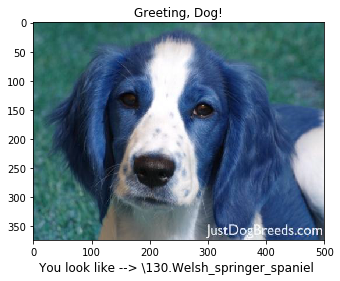

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:05 INFO predict_breed img_path= myimages\Brittany_02625.jpg
00:06:12 INFO predict_breed -> Time taken at 7.19 seconds


Prediction: Greeting, Dog! You look like --> \037.Brittany 


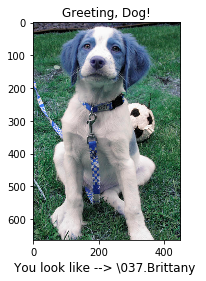

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:13 INFO predict_breed img_path= myimages\Curly-coated_retriever_03896.jpg
00:06:20 INFO predict_breed -> Time taken at 7.58 seconds


Prediction: Greeting, Dog! You look like --> \055.Curly-coated_retriever 


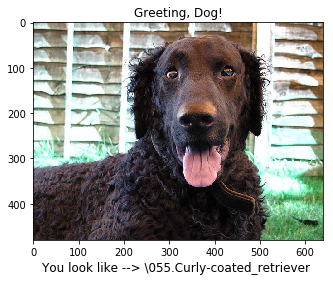

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:21 INFO predict_breed img_path= myimages\Labrador_retriever_06455.jpg
00:06:28 INFO predict_breed -> Time taken at 7.50 seconds


Prediction: Greeting, Dog! You look like --> \096.Labrador_retriever 


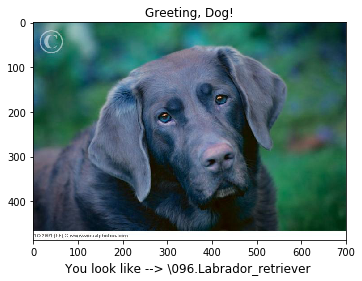

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:28 INFO predict_breed img_path= myimages\Labrador_retriever_06457.jpg
00:06:36 INFO predict_breed -> Time taken at 7.86 seconds


Prediction: Greeting, Dog! You look like --> \096.Labrador_retriever 


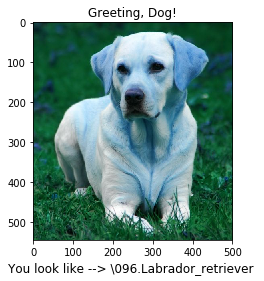

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:36 INFO predict_breed img_path= myimages\akita1.jpg
00:06:45 INFO predict_breed -> Time taken at 8.13 seconds


Prediction: Greeting, Dog! You look like --> \004.Akita 


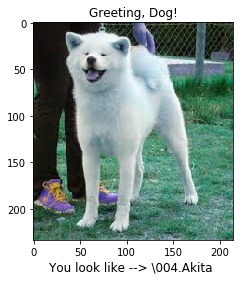

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:45 INFO predict_breed img_path= myimages\dog1.jpg
00:06:53 INFO predict_breed -> Time taken at 8.50 seconds


Prediction: Greeting, Dog! You look like --> \004.Akita 


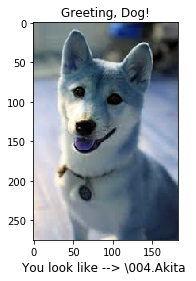

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:06:53 INFO predict_breed img_path= myimages\dog2.jpg
00:07:02 INFO predict_breed -> Time taken at 8.92 seconds


Prediction: Greeting, likely Dog! You look like --> \006.American_eskimo_dog 


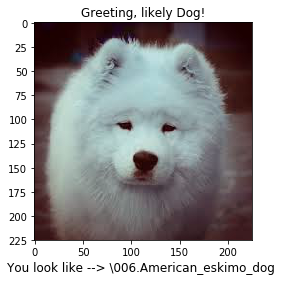

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:07:03 INFO predict_breed img_path= myimages\people1.jpg
00:07:12 INFO predict_breed -> Time taken at 9.22 seconds


Prediction: Greeting, Human! You look like --> \100.Lowchen 


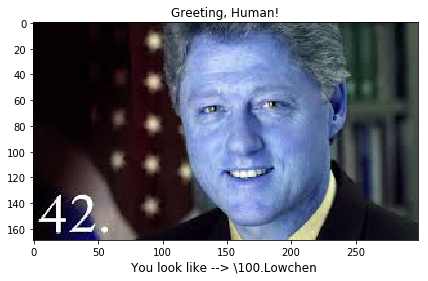

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:07:12 INFO predict_breed img_path= myimages\people3.jpg
00:07:22 INFO predict_breed -> Time taken at 9.94 seconds


Prediction: Greeting, Human! You look like --> \119.Petit_basset_griffon_vendeen 


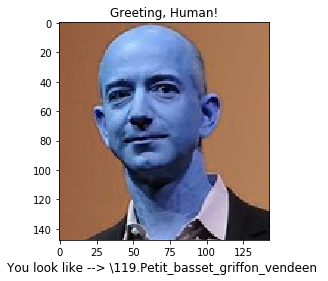

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:07:22 INFO predict_breed img_path= myimages\people2.jpg
00:07:33 INFO predict_breed -> Time taken at 10.31 seconds


Prediction: Greeting, Human! You look like --> \056.Dachshund 


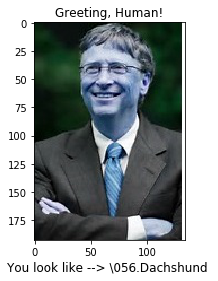

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:07:33 INFO predict_breed img_path= myimages\place1.jpg
00:07:43 INFO predict_breed -> Time taken at 10.08 seconds


Prediction: Sorry, problem to identify you as Dog, neither Human You look like --> \056.Dachshund 


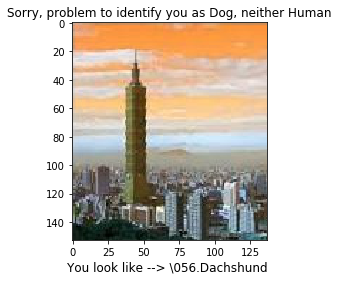

 --  --  --  --  --  --  --  --  --  --  --  --  --  --  -- 


00:07:43 INFO predict_breed img_path= myimages\galaxy.jpg
00:07:54 INFO predict_breed -> Time taken at 10.52 seconds


Prediction: Sorry, problem to identify you as Dog, neither Human You look like --> \067.Finnish_spitz 


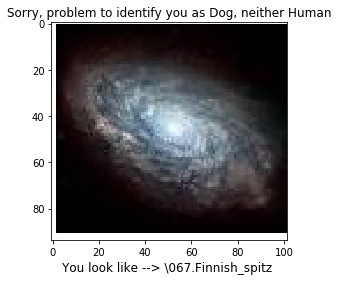

In [48]:
#32-------
## Execute algorithm from Step 6 on
## at least 6 images on your computer.
import cv2                
import matplotlib.pyplot as plt
import os
import glob

focTopic = "32 Test my Dog App"

da=DogApp()

path = "myimages"  # my test image files located at ./myimages path
valid_img_fnameext = [".png", ".jpg", ".gif", ".tga"]  # valid image filename extensions
debug( "{} using my image files".format(focTopic))

# iterate each file located at ./myimages, if filename extension in valid extensions like ".png", ".jpg", ".gif", ".tga"
for filepath in glob.glob(os.path.join(path, "*.*")):
    if (os.path.splitext(filepath)[1]).lower() in valid_img_fnameext: 
        # predict breed and display output
        pred = da.display_predict_breed(filepath)

# release unused references
plt.close(fig);
clean_mem()

- [A Beginner's Guide To Understanding Convolutional Neural Networks](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/)
- [A Beginner's Guide To Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)
- [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
- [Cats and dogs and convolutional neural networks](http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks)
- [CNN Architecture](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf)
- [CNN Architectures](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf) 
- [Convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network)
- [Data Augmentation: examples from keras blog - Classifier from little data](https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
- [Deep Learning from Udacity Machine Learning nanodegree](https://classroom.udacity.com/nanodegrees/nd009)
- [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/pdf/1503.03832.pdf)
- [FaceNet: A Unified Embedding for Face Recognition and Clustering by Felipe Bombardelli](https://web.inf.ufpr.br/menotti/ci171-2015-2-1/files/seminario-Felipe-slides.pdf)
- [For Dummies — The Introduction to Neural Networks we all need ! (Part 1)](https://medium.com/technologymadeeasy/for-dummies-the-introduction-to-neural-networks-we-all-need-c50f6012d5eb)
- [For Dummies — The Introduction to Neural Networks we all need ! (Part 2)](https://medium.com/technologymadeeasy/for-dummies-the-introduction-to-neural-networks-we-all-need-part-2-1218d5dc043)
- [How can I save a Keras model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model)    
- [How to Check-Point Deep Learning Models in Keras](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)
- [Image Augmentation for Deep Learning With Keras](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/) 
- [OpenCV Face Detection using Haar Cascades](https://hackprojects.wordpress.com/tutorials/opencv-python-tutorials/opencv-face-detection-using-haar-cascades/)
- [The 9 Deep Learning Papers You Need To Know About (Understanding CNNs Part 3)](https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html)
- [The best explanation of Convolutional Neural Networks on the Internet](https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8)
- [The Face Recognition Algorithm That Finally Outperforms Humans](https://medium.com/the-physics-arxiv-blog/the-face-recognition-algorithm-that-finally-outperforms-humans-2c567adbf7fc)
- [The role of view in human face detection](https://www.sciencedirect.com/science/article/pii/S0042698909002557)
- [Using GPUs in TensorFlow](https://www.tensorflow.org/tutorials/using_gpu) 
- Ref 1. [Convolutional Neural Network for Visual Recognition](http://cs231n.github.io/convolutional-networks/#overview)
- Ref 2. [Face Detection using Haar Cascades](https://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)
